In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# IMPORTING DATA AND BASIC DATA EXPLORATION

In [2]:
df = pd.read_csv('Glassdoor_AAPL.csv')
df

,Ticker,CompanyName,Review
0,AAPL,APPLE INC,Interview process takes forever. Be patient
1,AAPL,APPLE INC,highly competitive environment and no life wor...
2,AAPL,APPLE INC,Working hours. Boring routine.
3,AAPL,APPLE INC,"Apple obeys the law strictly. So, sometimes a ..."
4,AAPL,APPLE INC,Has to concentrate to archvement.
...,...,...,...
553,AAPL,APPLE INC,"Fun products, exciting launches, good salaries..."
554,AAPL,APPLE INC,"Nette Kollegen, Interessante Produkte, gutes T..."
555,AAPL,APPLE INC,"Everything is possible, you could take initiat..."
556,AAPL,APPLE INC,money time coffe free gym free lunch


In [3]:
df.head()

,Ticker,CompanyName,Review
0,AAPL,APPLE INC,Interview process takes forever. Be patient
1,AAPL,APPLE INC,highly competitive environment and no life wor...
2,AAPL,APPLE INC,Working hours. Boring routine.
3,AAPL,APPLE INC,"Apple obeys the law strictly. So, sometimes a ..."
4,AAPL,APPLE INC,Has to concentrate to archvement.


In [4]:
df.tail()

,Ticker,CompanyName,Review
553,AAPL,APPLE INC,"Fun products, exciting launches, good salaries..."
554,AAPL,APPLE INC,"Nette Kollegen, Interessante Produkte, gutes T..."
555,AAPL,APPLE INC,"Everything is possible, you could take initiat..."
556,AAPL,APPLE INC,money time coffe free gym free lunch
557,AAPL,APPLE INC,Excellent company to work for.


In [5]:
df.describe()

,Ticker,CompanyName,Review
count,558,558,558
unique,1,1,102
top,AAPL,APPLE INC,highly competitive environment and no life wor...
freq,558,558,20


In [6]:
df.shape

(558, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ticker       558 non-null    object
 1   CompanyName  558 non-null    object
 2   Review       558 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


In [8]:
duplicate_rows = df.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
553     True
554    False
555     True
556    False
557     True
Length: 558, dtype: bool

In [9]:
# Deleting Duplicates
df.drop_duplicates(keep='first', inplace=True)
df

,Ticker,CompanyName,Review
0,AAPL,APPLE INC,Interview process takes forever. Be patient
1,AAPL,APPLE INC,highly competitive environment and no life wor...
2,AAPL,APPLE INC,Working hours. Boring routine.
3,AAPL,APPLE INC,"Apple obeys the law strictly. So, sometimes a ..."
4,AAPL,APPLE INC,Has to concentrate to archvement.
...,...,...,...
500,AAPL,APPLE INC,"Gutes Team, faire Bezahlung, viele Lernmöglich..."
543,AAPL,APPLE INC,rebates on apple products %
550,AAPL,APPLE INC,team &amp; product discounts
554,AAPL,APPLE INC,"Nette Kollegen, Interessante Produkte, gutes T..."


In [10]:
#Deleting unnecessary columns
df.drop(['Ticker','CompanyName'],axis=1, inplace=True)
df

,Review
0,Interview process takes forever. Be patient
1,highly competitive environment and no life wor...
2,Working hours. Boring routine.
3,"Apple obeys the law strictly. So, sometimes a ..."
4,Has to concentrate to archvement.
...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich..."
543,rebates on apple products %
550,team &amp; product discounts
554,"Nette Kollegen, Interessante Produkte, gutes T..."


## VISUALISING TEXT DATA WITH WORDCLOUD

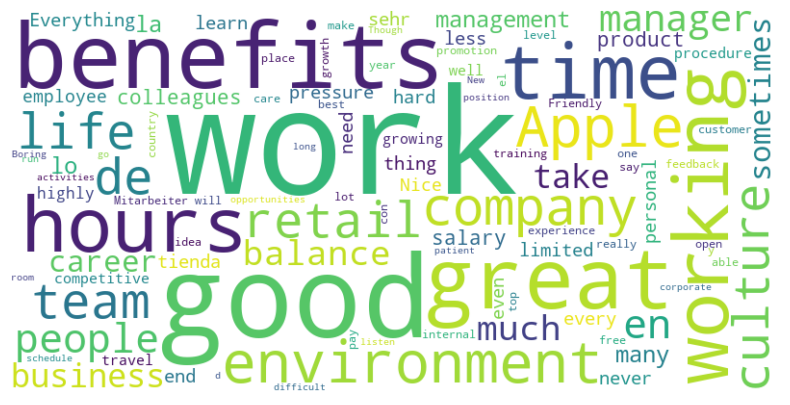

In [11]:
# Create a word cloud from the "Reviews" column in the DataFrame
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['Review']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# PRE-PROCESSING TEXT DATA
Remove stopwords from Reviews column and tokenize the text.
<br>Also create a function to join the new text which has been tokenized and stopwords removed.
 

In [12]:
stop_words = nltk.corpus.stopwords.words('english')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Define function to process text and create a new column for the processed reviews
def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['Processed Review'] = df['Review'].apply(preprocess_text)
df

,Review,Processed Review
0,Interview process takes forever. Be patient,interview process takes forever patient
1,highly competitive environment and no life wor...,highly competitive environment life work balance
2,Working hours. Boring routine.,working hours boring routine
3,"Apple obeys the law strictly. So, sometimes a ...",apple obeys law strictly sometimes small thing...
4,Has to concentrate to archvement.,concentrate archvement
...,...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich...",gutes team faire bezahlung viele lernmöglichke...
543,rebates on apple products %,rebates apple products
550,team &amp; product discounts,team amp product discounts
554,"Nette Kollegen, Interessante Produkte, gutes T...",nette kollegen interessante produkte gutes tra...


# SENTIMENT ANALYSIS USING VADER

In [13]:
#Only take the compound score because that's what we are interested in
sia = SentimentIntensityAnalyzer()
df['Vader Sentiment Score'] = df['Processed Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df

,Review,Processed Review,Vader Sentiment Score
0,Interview process takes forever. Be patient,interview process takes forever patient,0.0000
1,highly competitive environment and no life wor...,highly competitive environment life work balance,0.2484
2,Working hours. Boring routine.,working hours boring routine,-0.3182
3,"Apple obeys the law strictly. So, sometimes a ...",apple obeys law strictly sometimes small thing...,0.0000
4,Has to concentrate to archvement.,concentrate archvement,0.0000
...,...,...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich...",gutes team faire bezahlung viele lernmöglichke...,0.0000
543,rebates on apple products %,rebates apple products,0.0000
550,team &amp; product discounts,team amp product discounts,0.0000
554,"Nette Kollegen, Interessante Produkte, gutes T...",nette kollegen interessante produkte gutes tra...,0.0000


## ANALYSING SENTIMENT SCORE

In [14]:
#Define a score threshold to classify reviews based on sentiment score
threshold = 0
df['Vader Analysis'] = ['Positive' if score > threshold else 'Negative' if score 
                  < threshold  else 'Neutral' for score in df['Vader Sentiment Score']]
df

,Review,Processed Review,Vader Sentiment Score,Vader Analysis
0,Interview process takes forever. Be patient,interview process takes forever patient,0.0000,Neutral
1,highly competitive environment and no life wor...,highly competitive environment life work balance,0.2484,Positive
2,Working hours. Boring routine.,working hours boring routine,-0.3182,Negative
3,"Apple obeys the law strictly. So, sometimes a ...",apple obeys law strictly sometimes small thing...,0.0000,Neutral
4,Has to concentrate to archvement.,concentrate archvement,0.0000,Neutral
...,...,...,...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich...",gutes team faire bezahlung viele lernmöglichke...,0.0000,Neutral
543,rebates on apple products %,rebates apple products,0.0000,Neutral
550,team &amp; product discounts,team amp product discounts,0.0000,Neutral
554,"Nette Kollegen, Interessante Produkte, gutes T...",nette kollegen interessante produkte gutes tra...,0.0000,Neutral


# COUNTING AND VISUALISING ANALYSIS 

In [15]:
df['Vader Analysis'].value_counts()

Positive    55
Neutral     30
Negative    17
Name: Vader Analysis, dtype: int64

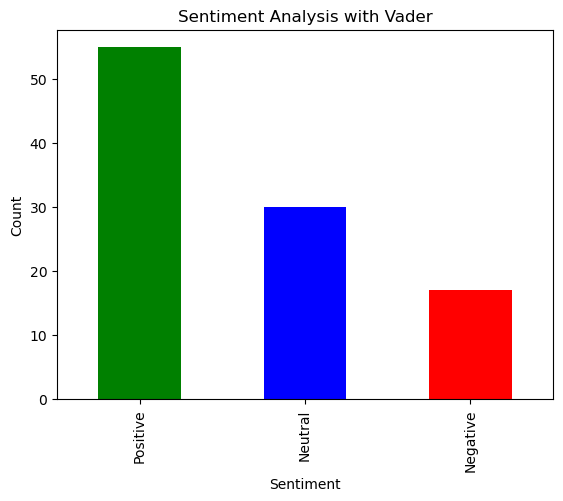

In [16]:
# Bar chart for review analysis
df['Vader Analysis'].value_counts().plot(kind='bar', color=['green','blue','red'])
plt.title('Sentiment Analysis with Vader')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## WORDCLOUD FOR POSITIVE AND NEGATIVE REVIEWS

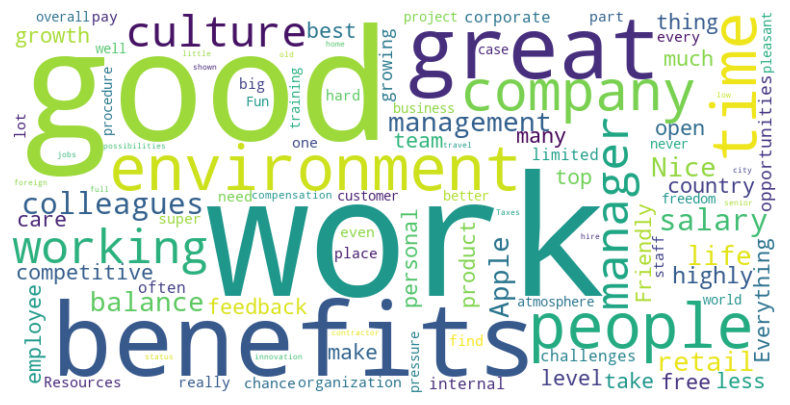

In [17]:
# Filter the DataFrame to only include rows with "Positive" sentiment
positive_df = df[df['Vader Analysis'] == 'Positive']

# Create a word cloud from the "Reviews" column in the filtered DataFrame
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(positive_df['Review']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

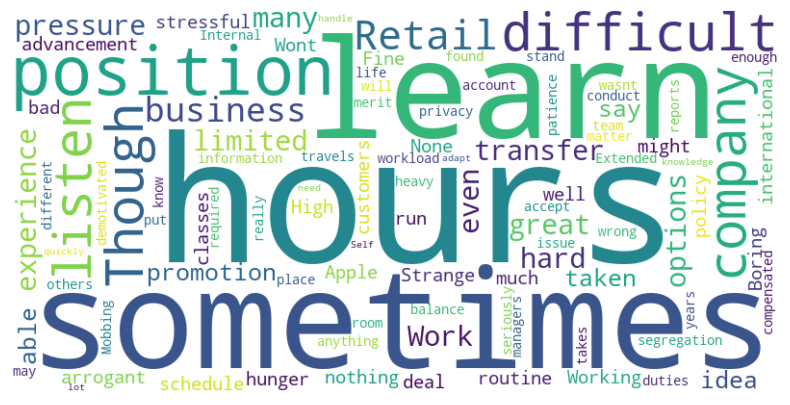

In [18]:
# Filter the DataFrame to only include rows with "Positive" sentiment
negative_df = df[df['Vader Analysis'] == 'Negative']

# Create a word cloud from the "Reviews" column in the filtered DataFrame
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(negative_df['Review']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# SENTIMENT ANALYSIS WITH TEXTBLOB

In [19]:
# Define Function to get Subjectivity and Polarity of Reviews
def text_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def text_polarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
# Call function and create new columns with Subjectivity and Polarity scores 
df['TextBlob Subjectivity'] = df['Processed Review'].apply(text_subjectivity)
df['TextBlob Polarity'] = df['Processed Review'].apply(text_polarity)

df

,Review,Processed Review,Vader Sentiment Score,Vader Analysis,TextBlob Subjectivity,TextBlob Polarity
0,Interview process takes forever. Be patient,interview process takes forever patient,0.0000,Neutral,0.00,0.00
1,highly competitive environment and no life wor...,highly competitive environment life work balance,0.2484,Positive,0.54,0.16
2,Working hours. Boring routine.,working hours boring routine,-0.3182,Negative,1.00,-1.00
3,"Apple obeys the law strictly. So, sometimes a ...",apple obeys law strictly sometimes small thing...,0.0000,Neutral,0.40,-0.15
4,Has to concentrate to archvement.,concentrate archvement,0.0000,Neutral,0.00,0.00
...,...,...,...,...,...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich...",gutes team faire bezahlung viele lernmöglichke...,0.0000,Neutral,0.00,0.00
543,rebates on apple products %,rebates apple products,0.0000,Neutral,0.00,0.00
550,team &amp; product discounts,team amp product discounts,0.0000,Neutral,0.00,0.00
554,"Nette Kollegen, Interessante Produkte, gutes T...",nette kollegen interessante produkte gutes tra...,0.0000,Neutral,0.00,0.00


## VISUALISE SUBJECTIVITY AND POLARITY

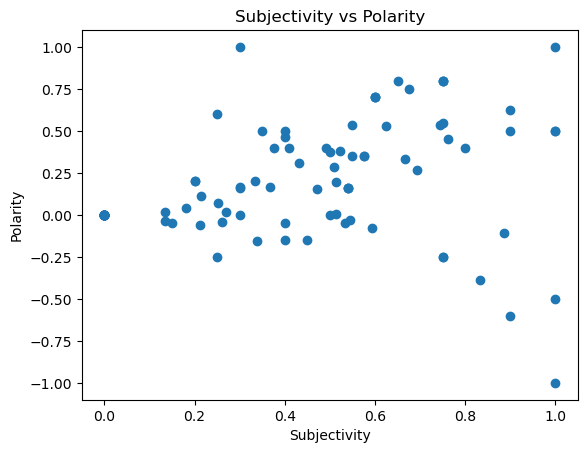

In [21]:
# Create a scatter plot to visualize the relationship between the "Subjectivity" and "Polarity"
plt.scatter(df['TextBlob Subjectivity'], df['TextBlob Polarity'])
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Subjectivity vs Polarity')
plt.show()

In [22]:
# Define a function to perform sentiment analysis using TextBlob using Polarity Scores
def analyze_sentiment(text):
    textblob_analysis = TextBlob(text)
    polarity = textblob_analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [23]:
# Apply the sentiment analysis function to the "Processed Reviews" column
df['TextBlob Analysis'] = df['Processed Review'].apply(analyze_sentiment)
df

,Review,Processed Review,Vader Sentiment Score,Vader Analysis,TextBlob Subjectivity,TextBlob Polarity,TextBlob Analysis
0,Interview process takes forever. Be patient,interview process takes forever patient,0.0000,Neutral,0.00,0.00,Neutral
1,highly competitive environment and no life wor...,highly competitive environment life work balance,0.2484,Positive,0.54,0.16,Positive
2,Working hours. Boring routine.,working hours boring routine,-0.3182,Negative,1.00,-1.00,Negative
3,"Apple obeys the law strictly. So, sometimes a ...",apple obeys law strictly sometimes small thing...,0.0000,Neutral,0.40,-0.15,Negative
4,Has to concentrate to archvement.,concentrate archvement,0.0000,Neutral,0.00,0.00,Neutral
...,...,...,...,...,...,...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich...",gutes team faire bezahlung viele lernmöglichke...,0.0000,Neutral,0.00,0.00,Neutral
543,rebates on apple products %,rebates apple products,0.0000,Neutral,0.00,0.00,Neutral
550,team &amp; product discounts,team amp product discounts,0.0000,Neutral,0.00,0.00,Neutral
554,"Nette Kollegen, Interessante Produkte, gutes T...",nette kollegen interessante produkte gutes tra...,0.0000,Neutral,0.00,0.00,Neutral


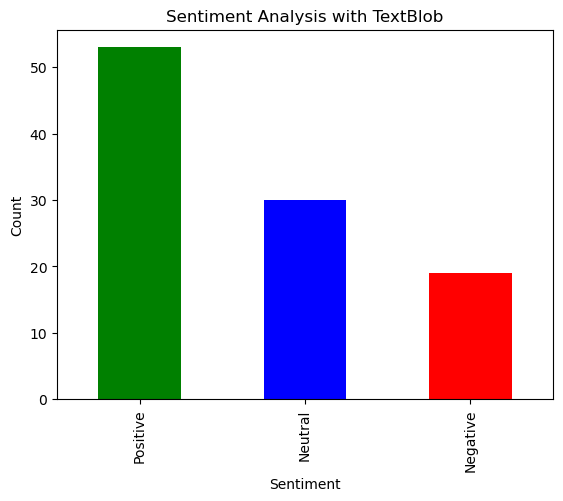

In [24]:
# Bar chart for review analysis
df['TextBlob Analysis'].value_counts().plot(kind='bar', color=['green','blue','red'])
plt.title('Sentiment Analysis with TextBlob')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [25]:
df['TextBlob Analysis'].value_counts()

Positive    53
Neutral     30
Negative    19
Name: TextBlob Analysis, dtype: int64

# COMPARING VADER AND TEXTBLOB

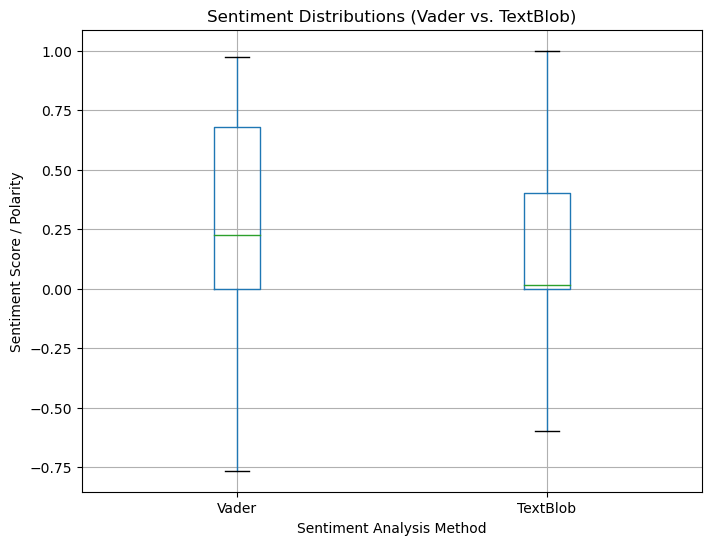

In [26]:
# Visualize sentiment distributions using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column=['Vader Sentiment Score', 'TextBlob Polarity'], showfliers=False)
plt.title('Sentiment Distributions (Vader vs. TextBlob)')
plt.ylabel('Sentiment Score / Polarity')
plt.xlabel('Sentiment Analysis Method')
plt.xticks(ticks=[1, 2], labels=['Vader', 'TextBlob'])
plt.show()

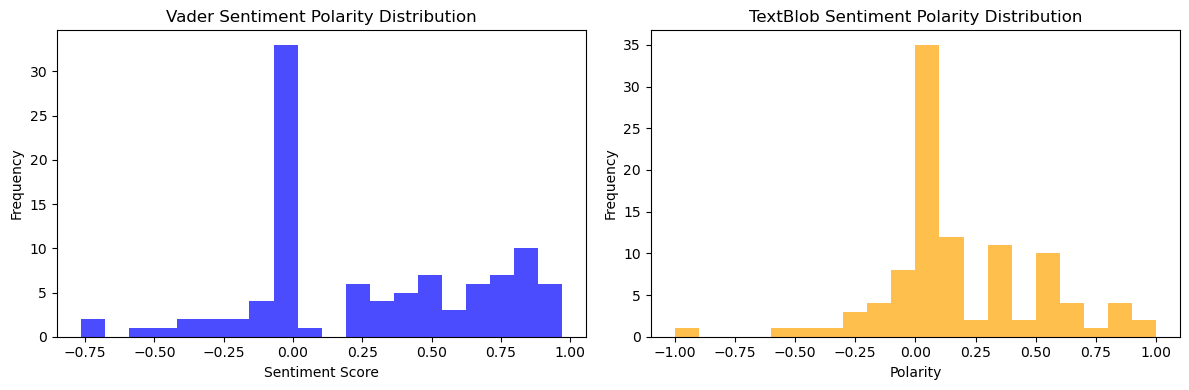

In [27]:
# Visualize polarity and subjectivity values using histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Vader Sentiment Score'], bins=20, color='blue', alpha=0.7)
plt.title('Vader Sentiment Polarity Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['TextBlob Polarity'], bins=20, color='orange', alpha=0.7)
plt.title('TextBlob Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# TOPIC MODELLING WITH K MEANS CLUSTERING

In [28]:
# Perform text clustering with K-means algorithm
num_clusters = 5 # Specify the number of clusters
vectorizer = TfidfVectorizer() # Initialize TF-IDF vectorizer
X = vectorizer.fit_transform(df['Processed Review']) # Vectorize the reviews column
kmeans = KMeans(n_clusters=num_clusters, random_state=42) # Initialize K-means algorithm with desired number of clusters
kmeans.fit(X) # Fit K-means to the vectorized data

KMeans(n_clusters=5, random_state=42)

In [29]:
# Evaluate clustering results with silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.012550237936990258


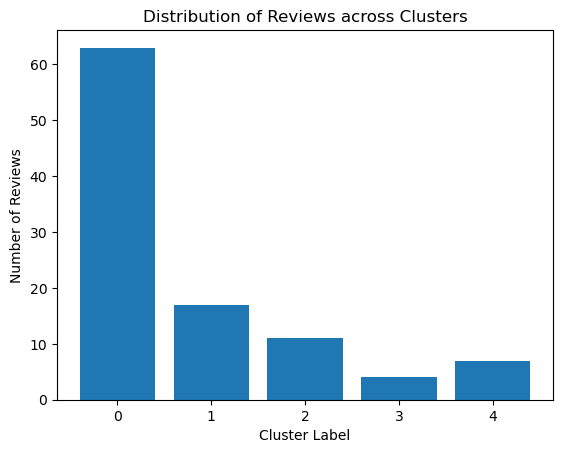

In [30]:
# Create a bar chart to visualize the distribution of reviews across clusters
cluster_counts = pd.Series(labels).value_counts()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews across Clusters')
plt.show()

In [31]:
# Extract the cluster centroids (representative points) from the fitted K-means model
cluster_centroids = kmeans.cluster_centers_

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names()

In [32]:
# Print the top n keywords for each cluster
n_top_keywords = 10 # Specify the number of top keywords to display
for i, centroid in enumerate(cluster_centroids):
    print(f'Cluster {i}:')
    top_keywords_idx = centroid.argsort()[::-1][:n_top_keywords]
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    print(', '.join(top_keywords))
    print('-----')

Cluster 0:
work, great, benefits, time, much, life, culture, team, balance, competitive
-----
Cluster 1:
good, people, salary, benefits, nice, work, training, company, environment, management
-----
Cluster 2:
working, hours, retail, long, anyone, creative, absolutely, environment, routine, business
-----
Cluster 3:
de, en, peu, possibilité, evoluer, comercio, trabajo, nada, el, la
-----
Cluster 4:
apple, products, rebates, ideas, listen, needs, arrogant, wont, find, say
-----


In [33]:
# Predict the cluster labels for each review
predicted_labels = kmeans.predict(X)

# Add the predicted cluster labels to the original dataframe
df['Cluster_Labels'] = predicted_labels

# Group the reviews by cluster labels
clustered_reviews = df.groupby('Cluster_Labels')['Processed Review'].apply(list)

df

,Review,Processed Review,Vader Sentiment Score,Vader Analysis,TextBlob Subjectivity,TextBlob Polarity,TextBlob Analysis,Cluster_Labels
0,Interview process takes forever. Be patient,interview process takes forever patient,0.0000,Neutral,0.00,0.00,Neutral,0
1,highly competitive environment and no life wor...,highly competitive environment life work balance,0.2484,Positive,0.54,0.16,Positive,0
2,Working hours. Boring routine.,working hours boring routine,-0.3182,Negative,1.00,-1.00,Negative,2
3,"Apple obeys the law strictly. So, sometimes a ...",apple obeys law strictly sometimes small thing...,0.0000,Neutral,0.40,-0.15,Negative,4
4,Has to concentrate to archvement.,concentrate archvement,0.0000,Neutral,0.00,0.00,Neutral,0
...,...,...,...,...,...,...,...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich...",gutes team faire bezahlung viele lernmöglichke...,0.0000,Neutral,0.00,0.00,Neutral,0
543,rebates on apple products %,rebates apple products,0.0000,Neutral,0.00,0.00,Neutral,4
550,team &amp; product discounts,team amp product discounts,0.0000,Neutral,0.00,0.00,Neutral,0
554,"Nette Kollegen, Interessante Produkte, gutes T...",nette kollegen interessante produkte gutes tra...,0.0000,Neutral,0.00,0.00,Neutral,0


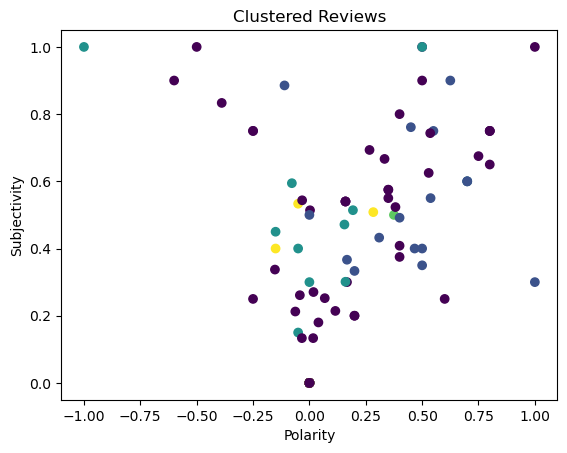

In [34]:
# Create a scatter plot
plt.scatter(df['TextBlob Polarity'], df['TextBlob Subjectivity'], c=df['Cluster_Labels'], cmap='viridis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Clustered Reviews')
plt.show()

# Topic Modelling With LDA

In [35]:
# Create a CountVectorizer object to convert text data into numerical features
lda_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

# Fit and transform the review column using the CountVectorizer
lda_X = lda_vectorizer.fit_transform(df['Processed Review'])

# Create an LDA model with 10 topics
lda_topics = 10
lda = LatentDirichletAllocation(n_components=lda_topics, random_state=42)

# Fit the LDA model to the transformed review data
lda.fit(lda_X)

# Extract the topics and their associated words
lda_topic_words = lda.components_
lda_feature_names = lda_vectorizer.get_feature_names_out()

Topic #1:
good, work, benefits, environment, working, culture, friendly, pressure, feedback, sehr


Topic #2:
nice, work, place, thing, people, salary, long, competitive, apple, good


Topic #3:
work, apple, great, best, products, run, culture, ideas, overall, care


Topic #4:
time, career, limited, mitarbeiter, say, free, aber, opportunities, gutes, growing


Topic #5:
people, salary, company, good, training, freedom, organization, big, corporate, internal


Topic #6:
great, team, personal, balance, life, growth, benefits, managers, country, things


Topic #7:
work, hours, en, la, business, el, lo, time, tienda, day


Topic #8:
hours, environment, able, procedure, taken, case, tiendas, los, work, working


Topic #9:
benefits, retail, en, colleagues, apple, pay, employees, different, hard, learn


Topic #10:
end, life, patient, promotion, difficult, takes, learning, time, hard, think




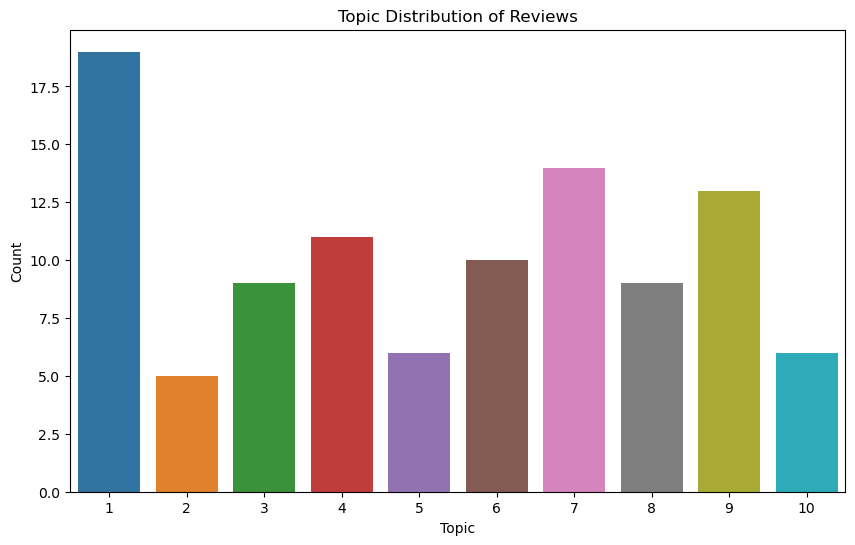

In [36]:
# Visualize the top 10 words for each topic
for topic_idx, topic in enumerate(lda_topic_words):
    print(f"Topic #{topic_idx+1}:")
    top_words_idx = topic.argsort()[:-11:-1] # Get the top 10 word indices
    top_words = [lda_feature_names[i] for i in top_words_idx]
    print(", ".join(top_words))
    print("\n")

# Visualize the topic distribution for each review
lda_topic_distribution = lda.transform(lda_X)
df['LDA Topic'] = lda_topic_distribution.argmax(axis=1) + 1 # Add 1 to the topic index to start from 1

# Plot the topic distribution using a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(df['LDA Topic'])
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Distribution of Reviews')
plt.show()

# Final DF Showing Reviews, Sentiments and Topics 

In [37]:
df

,Review,Processed Review,Vader Sentiment Score,Vader Analysis,TextBlob Subjectivity,TextBlob Polarity,TextBlob Analysis,Cluster_Labels,LDA Topic
0,Interview process takes forever. Be patient,interview process takes forever patient,0.0000,Neutral,0.00,0.00,Neutral,0,10
1,highly competitive environment and no life wor...,highly competitive environment life work balance,0.2484,Positive,0.54,0.16,Positive,0,7
2,Working hours. Boring routine.,working hours boring routine,-0.3182,Negative,1.00,-1.00,Negative,2,1
3,"Apple obeys the law strictly. So, sometimes a ...",apple obeys law strictly sometimes small thing...,0.0000,Neutral,0.40,-0.15,Negative,4,2
4,Has to concentrate to archvement.,concentrate archvement,0.0000,Neutral,0.00,0.00,Neutral,0,1
...,...,...,...,...,...,...,...,...,...
500,"Gutes Team, faire Bezahlung, viele Lernmöglich...",gutes team faire bezahlung viele lernmöglichke...,0.0000,Neutral,0.00,0.00,Neutral,0,4
543,rebates on apple products %,rebates apple products,0.0000,Neutral,0.00,0.00,Neutral,4,3
550,team &amp; product discounts,team amp product discounts,0.0000,Neutral,0.00,0.00,Neutral,0,6
554,"Nette Kollegen, Interessante Produkte, gutes T...",nette kollegen interessante produkte gutes tra...,0.0000,Neutral,0.00,0.00,Neutral,0,4
